<a href="https://colab.research.google.com/github/jacob-siby/creditcardfraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/SideProj/CreditCardFraud')

In [4]:
import pandas as pd

df = pd.read_csv('fraudTrain.csv')


df.head()


Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

#Preprocessing

In [5]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
type(df['trans_date_trans_time'])


pandas.core.series.Series

In [6]:
df['trans_date']= pd.to_datetime(df['trans_date_trans_time']).dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time
df['trans_time'].head()

0    00:00:18
1    00:00:44
2    00:00:51
3    00:01:16
4    00:03:06
Name: trans_time, dtype: object

In [8]:
del df['trans_date_trans_time']
del df['Unnamed: 0']
del df['first']
del df['last']
del df['unix_time']
del df['trans_num']

In [9]:
df.shape

(1296675, 19)

In [10]:
df.describe()

cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  5.109788e+00  1.377109e+01  7.586269e-02  
min    2.300000e+01  1.902779e+01 -1.666712e+02  0.000000e+00  
25%    7.430000e+02  3.473357e+01 -9.689728e+01  0.000000e+00  
50%    2.456000e+03  3.936568e+01 -8.743839e+01  0.000000e+00  
75%    2.032800e+04  4.195716e+01 -8.023680e+01  0.000000e+00  
max    2.906700e+06  6.751027e+01 -6.695090e+01  1.000000e+00

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  object 
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  object 
 5   street      1296675 non-null  object 
 6   city        1296675 non-null  object 
 7   state       1296675 non-null  object 
 8   zip         1296675 non-null  int64  
 9   lat         1296675 non-null  float64
 10  long        1296675 non-null  float64
 11  city_pop    1296675 non-null  int64  
 12  job         1296675 non-null  object 
 13  dob         1296675 non-null  object 
 14  merch_lat   1296675 non-null  float64
 15  merch_long  1296675 non-null  float64
 16  is_fraud    1296675 non-null  int64  
 17  trans_date  1296675 non-null  object 
 18  trans_time  1296675 no

In [14]:
#saving as csv
df.to_csv('processedFile.csv')

In [15]:
#label encoder merchant
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['merchant'].unique())
desg=df['merchant'].unique()
df['merchant']= label_encoder.fit_transform(df['merchant'])
desg_en=df['merchant'].unique()
print(df['merchant'].unique())

['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosciski,

In [16]:
#label encoder gender
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['gender'].unique())
desg=df['gender'].unique()
df['gender']= label_encoder.fit_transform(df['gender'])
desg_en=df['gender'].unique()
print(df['gender'].unique())

['F' 'M']
[0 1]


In [17]:
#label encoder street
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['street'].unique())
desg=df['street'].unique()
df['street']= label_encoder.fit_transform(df['street'])
desg_en=df['street'].unique()
print(df['street'].unique())

['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 White Dale Suite 530' '9443 Cynthia Court Apt. 038'
 '408 Bradley Rest' '4655 David Island' '889 Sarah Station Suite 624'
 '231 Flores Pass Suite 720' '6888 Hicks Stream Suite 954'
 '21326 Taylor Squares Suite 708' '1831 Faith View Suite 653'
 '43576 Kristina Islands' '3337 Lisa Divide' '5916 Susan Bridge Apt. 939'
 '1632 Cohen Drive Suite 639' '870 Rocha Drive'
 '44259 Beth Station Suite 215' '4923 Campbell Pines Suite 717'
 '268 Hayes Rue Suite 811' '269 Sanchez Rapids' '4005 Dana Glens'
 '21447 Powell Circle' '2481 Mills Lock' '759 Erin Mount Suite 956'
 '7683 Natasha Way Apt. 945' '551 Zachary Freeway' '61390 Hayes Port'
 '7483 Navarro Flats' '2711 Duran Pines' '969 Huerta Path Apt. 270'
 '57887 Gutierrez Harbor' '39787 Pamela Fall Suite 639'
 '445 Jerry Lights Apt. 081' '50872 Alex Plain Suite 088'
 '20937 Reed Lakes Apt. 271' '61107 Edwards Dam Apt. 463'
 '9333 Valentine Point' '742 Oneill Shore' '41851 Victor Drives Suite 21

In [18]:
#label encoder city
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['city'].unique())
desg=df['city'].unique()
df['city']= label_encoder.fit_transform(df['city'])
desg_en=df['city'].unique()
print(df['city'].unique())

['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Conway' 'New Goshen' 'Sunflower'
 'Enola' 'Roosevelt' 'Pointe Aux Pins' 'Dallas' 'Jay' 'North Tonawanda'
 'Athena' 'Chester' 'Elkhart' 'Surrency' 'Arcadia' 'Gaithersburg'
 'Bowdoin' 'Heart Butte' 'San Jose' 'Rumely' 'Cranks' 'Ravenna' 'Utica'
 'Uledi' 'Naples' 'Thida' 'Parks' 'Central' 'Fort Washakie' 'Etlan'
 'Brinson' 'Shrewsbury' 'Bigelow' 'North Washington' 'Holloway'
 'Littleton' 'Hinesburg' 'Meadville' 'Elberta' 'Moab' 'Diamond' 'Bra

In [19]:
#label encoder state
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['state'].unique())
desg=df['state'].unique()
df['state']= label_encoder.fit_transform(df['state'])
desg_en=df['state'].unique()
print(df['state'].unique())

['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']
[27 47 13 26 45 38 16 42 12 49  9  4 32 31 36 15 19 43 48 22 50 11 29 37
 18  7 17 34 25 44  1  2 20 10 21  3 23 35  5 46 24 40 33 14 30 41  0 28
  6 39  8]


In [20]:
#label encoder job
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(df['job'].unique())
desg=df['job'].unique()
df['job']= label_encoder.fit_transform(df['job'])
desg_en=df['job'].unique()
print(df['job'].unique())

['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources offi

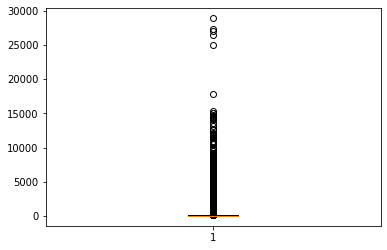

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
plt.boxplot(df["amt"])
plt.show()

In [22]:
print(df['amt'].skew())

42.277873790051174


In [23]:
df['amt'].std()

160.3160385715229

In [24]:
df['amt'].mean()

70.35103545606833

In [25]:
df['amt'].min()

1.0

In [26]:
df['amt'].max()

28948.9

In [27]:
Q3 = np.quantile(df['amt'], 0.75)
Q1 = np.quantile(df['amt'], 0.25)
print(Q1,Q3)

9.65 83.14


In [41]:
len(np.where(df['amt']<83.14)[0])

972492